<a href="https://colab.research.google.com/github/Pramitreddy17/ML/blob/main/practical_7_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:

file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print("The dimensions of dataset are as follows")
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
bagging_model_new = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                 n_estimators=100, random_state=42)

# Fit the model to the data
bagging_model_new.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model_new.predict(X_test)

# Evaluate performance
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {bagging_accuracy:.4f}")
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))




Bagging Accuracy: 0.7403
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [ ]:
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_model.predict(X_test)

# Evaluate performance
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
print(f"Boosting Accuracy: {boosting_accuracy:.4f}")
print("Boosting Classification Report:")
print(classification_report(y_test, y_pred_boosting))


Boosting Accuracy: 0.7468
Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
def plot_cm(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


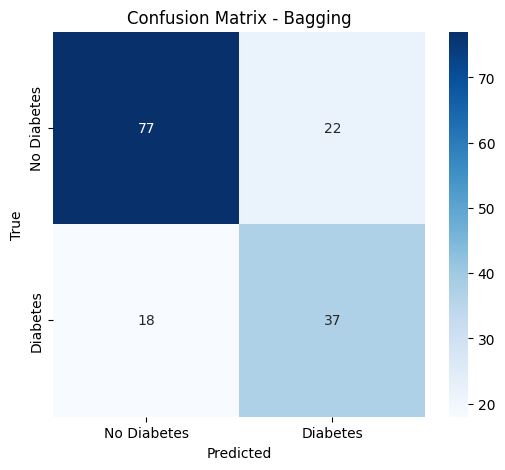

In [ ]:
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plot_cm(cm_bagging, 'Bagging')


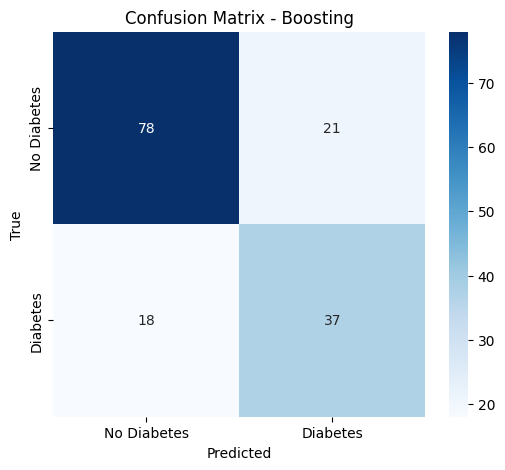

In [ ]:
cm_boosting = confusion_matrix(y_test, y_pred_boosting)
plot_cm(cm_boosting, 'Boosting')

In [ ]:
models = ['Bagging', 'Boosting']
accuracies = [bagging_accuracy, boosting_accuracy]

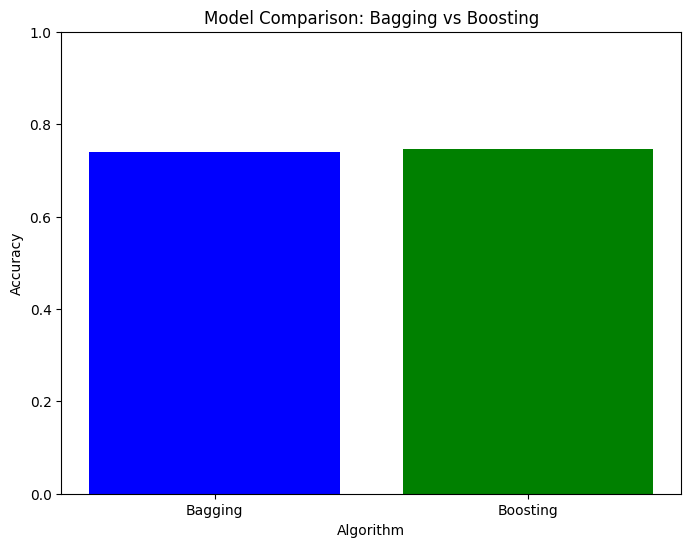

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison: Bagging vs Boosting')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()